In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<H4> - Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
df = df.set_index('date')

<H4> - Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
percentile_2_5 = df['value'].quantile(0.025)
percentile_97_5 = df['value'].quantile(0.975)

In [5]:
df = df[(df['value'] >= percentile_2_5) & (df['value'] <= percentile_97_5)]

<H4> - Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
 

In [6]:
import matplotlib.dates as mdates
import matplotlib.pylab as plt

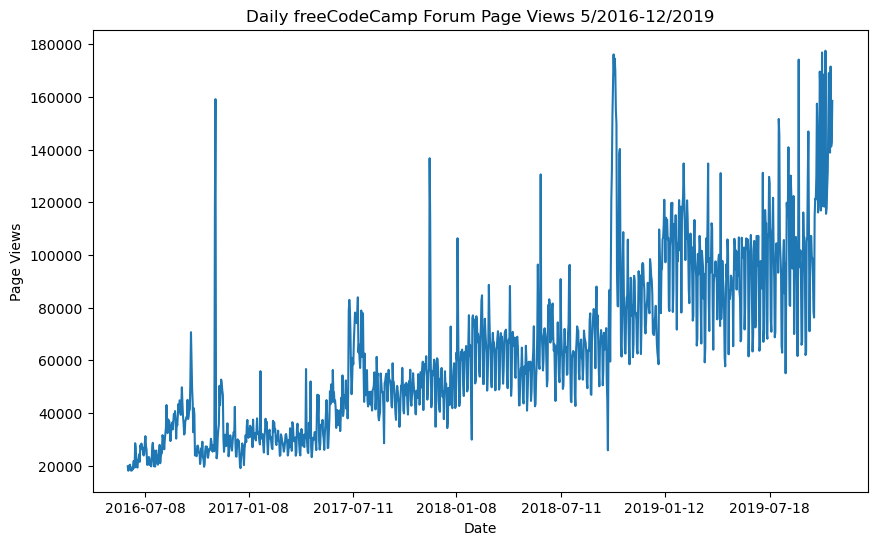

In [7]:
def draw_line_plot():
    plt.figure(figsize=(10,6))
    plt.plot(df.index,df['value'])
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
     
    #plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m"))
    
    # Customize x-axis date tick interval (every 6 months)
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=6))
    
    #Show the plot
    plt.show()
    
draw_line_plot()

<H4> - Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [8]:
df.index = pd.to_datetime(df.index)

In [10]:
months = ['January','February','March','April',
         'May','Jun','July','August',
         'September','October','November','December']

In [11]:
df['years'] = df.index.year
df['month'] = df.index.month
df['month'] = df['month'].apply(lambda data:months[data-1])
df['month'] = pd.Categorical(df['month'],categories=months)

In [12]:
df_pivot = pd.pivot_table(df, values='value',
                          index='years',columns='month',
                         aggfunc=np.mean)

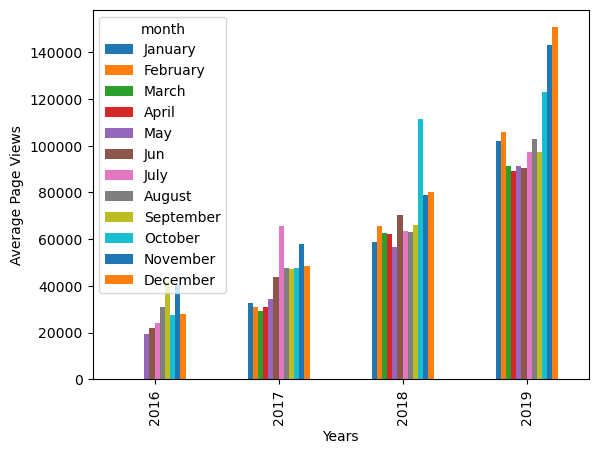

In [13]:
def draw_bar_plot():
    ax = df_pivot.plot(kind='bar')
    fig = ax.get_figure()
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    plt.show()

draw_bar_plot()

<H4> - Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

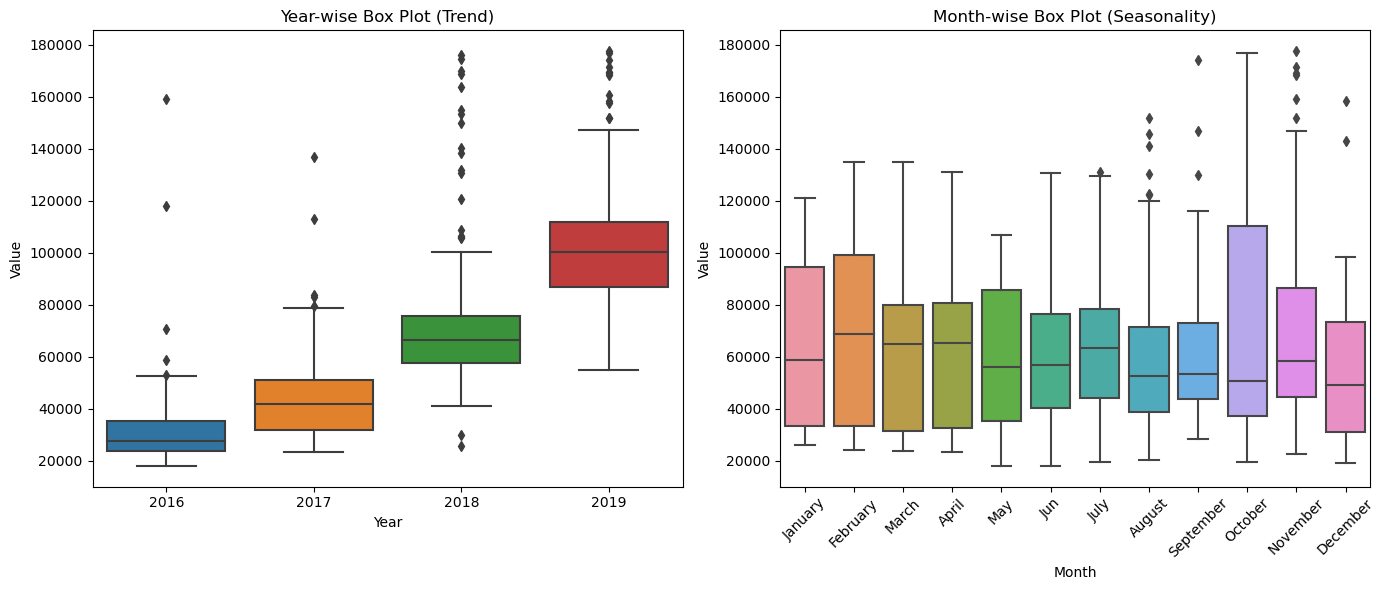

In [18]:
def draw_box_plot():
    fig, axes = plt.subplots(1,2,figsize=(14,6))
    
    #Year-wise box plot
    sns.boxplot(x='years', y='value', data=df,ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Value')
    
    # Month-wise box plot
    sns.boxplot(x='month', y='value', data=df,ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Value')
    plt.xticks(rotation=45)
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    #Show the plots
    plt.show()

draw_box_plot()